# Report

## About

This is a review of the structure data on the web patterns for the noted resources.  This is also a test of a template for reports so feedback on what works, what doesn't and what feels like filler is more than welcome.  The goal of these sort of documents is to help both parties communicate points to each other.  

This report is done in a Jupyter notebook, so the hope is that the PDF version can be used for basic communications.  Then the notebook could be shared to allow both sides to express, where needed, in runnable code.

Likely the notebook would be shared with private gists or other approaches.  To do this it will be important to generate and share the Python requirements.txt for the python environment and that has not been done yet.  In this report, I am not using any code to present the issues, so it's not important. 

This document looked at the following resources.

- [EDMO Marine organisations](https://edmo.seadatanet.org/search)
- [EDMERP Marine Research projects](https://edmo.seadatanet.org/results/service_edmerp/0014) 
- [EDMED Databases](https://edmo.seadatanet.org/results/service_edmed/0015)  

A few issues were found with the implementation of resources found through these and those are noted in the Issues section.  

## Focus

This section briefly notes the resource(s) reviewed and if this is likely an issue affecting other resources. 

- [ ] robots.txt
- [x] sitemap.xml
- [x] Resource(s):  [https://edmo.seadatanet.org/report/1994](https://edmo.seadatanet.org/report/1994)
- [ ] Validation issue:  [example] resource URL(s)
- [ ] GitHub Issue or other issue URL: resource URL(s)
- [ ] Other:  

Is this a systemic or recurring issue with other resources?

- [x] Likely
- [ ] Unlikely
- [ ] Unknown


## Issue(s)

### Summary

I was not able to find a robots.txt (no issue) but did find a sitemap.xml at [https://www.seadatanet.org/sitemap.xml](https://www.seadatanet.org/sitemap.xml).  This was an index that let to [https://www.seadatanet.org/sitemap_seadatacloud%2Cseadatacloud.xml](https://www.seadatanet.org/sitemap_seadatacloud%2Cseadatacloud.xml) but this resulted in an error for me.  The report was:

```
[500] Internal Server ErrorError: Call to a member function getId() on null
```

Overall the JSON-LD related issues are small.  They are detailed following, but briefly are:

1. context needs a trailing /
2. context should be a map
3. document should have an @id entry

Items of note (ie, suggestions, not issues) are:

1. empty nodes can be left out (not an error, will result in empty string literal object)


### Issue 1 and 2:  Context format and map requirement

For example resource [https://edmo.seadatanet.org/report/1994](https://edmo.seadatanet.org/report/1994) we can do a view source to arrive at:

```JSON
{
    "@context": "https://schema.org",
    "@type": "Organization",
    "name": "Centre Recherche en Astronomie, Astrophysique et Géophysique",
    "identifier": "1994",
    "alternateName": "CRAAG",
    "url": "https://edmo.seadatanet.org/report/1994",
    "address": {
    "@type": "PostalAddress",
    "addressLocality": "Alger, Algeria",
    "streetAddress": "Bouzareah route de l'observatoire"
},
    "sameAs": [""],
    "memberOf": {
    "@type": "ProgramMembership",
    "programName": "European Directory of Marine Organisations (EDMO)"
}
}
```

There are a few issues with this package.  First, the context line

```JSON
    "@context": "https://schema.org",
```

should be

```JSON
    "@context": {"@vocab": "https://schema.org/"},
```

With a trailing / at the end to form a proper prefix and align with JSON-LD requiring context be a map (reference: https://www.w3.org/TR/json-ld/#context-definitions) 

Updated JSON can be seen below with the corrected context.  

```JSON
{
	"@context": {
		"@vocab": "https://schema.org/"
	},
	"@type": "Organization",
	"name": "Centre Recherche en Astronomie, Astrophysique et Géophysique",
	"identifier": "1994",
	"alternateName": "CRAAG",
	"url": "https://edmo.seadatanet.org/report/1994",
	"address": {
		"@type": "PostalAddress",
		"addressLocality": "Alger, Algeria",
		"streetAddress": "Bouzareah route de l'observatoire"
	},
	"sameAs": [""],
	"memberOf": {
		"@type": "ProgramMembership",
		"programName": "European Directory of Marine Organisations (EDMO)"
	}
}
```

### Issue 3: Lack of @id

The data graph lacks an @id.   The identifier of 1994 is fine if that is the internal ID.  When converted for use in the OIH graph the lack of an @id will result in a blank node for this resource.  This can have issues for the use of this resoruces in a linked open data approach.  Making it hard for other users to link to or reference this resource.  For this case I'd likely suggest the URL being used as the @id so something like:


```JSON
{
	"@context": {
		"@vocab": "https://schema.org/"
	},
	"@type": "Organization",
    "@id": "https://edmo.seadatanet.org/report/1994",
	"name": "Centre Recherche en Astronomie, Astrophysique et Géophysique",
	"identifier": "1994",
    ...
```

Other alternatives for this @id value would be things like a DOI.  Note, resources at a site are note required to use the same @id schema. 


### Note 1:  Empty node

This is not an error, but empty nodes like the ```sameAs``` don't need to be present.  



## Reference(s)


[https://www.w3.org/TR/json-ld/#context-definitions](https://www.w3.org/TR/json-ld/#context-definitions)
> With a trailing / at the end to form a proper prefix and align with JSON-LD requiring context be a map 


## Approaches and Tools

This section will detail out any approaches or tools used in the assessment or that are useful to exposing the topic of this document.

In this case I am simply including some of the online resources that can be used to look at and debug JSON and JSON-LD documents. 


#### Using JSON-LD Playground

[https://json-ld.org/playground/](https://json-ld.org/playground/)


#### Using Online Linting

[https://jsonlint.com/](https://jsonlint.com/)


#### Schema.org validator

[https://validator.schema.org/](https://validator.schema.org/)



# OIH Alingnment

This section is not completed yet but will look at the alignment of the resources to OIH guidance


## OIH Institution

It looks on a quick inspection we are dealing mostly with type organization.  In that case then a resource like
https://edmo.seadatanet.org/report/1994  would be checked against https://book.oceaninfohub.org/thematics/expinst/README.html.

For the most part these are more than usable resources.  There are a few enhancement that are mostly about improving the use of IDs and PIDs (if available) to improve linking.  However, my initial qucik review is that these type Organization documents will work well with the graph and query approaches being used.

A more detailed check will follow. 

# Supporting Code Elements


## About

This section is just for testing the report approach and doesn't provide any useful information for this report. 

In [1]:
datagraph = """
{
    "@context": {
        "@vocab": "https://schema.org/"
    },
    "@id": "https://edmo.seadatanet.org/report/1994",
    "@type": "Organization",
    "name": "Centre Recherche en Astronomie, Astrophysique et Géophysique",
    "identifier": "1994",
    "alternateName": "CRAAG",
    "url": "https://edmo.seadatanet.org/report/1994",
    "address": {
        "@id": "_:n1",
        "@type": "PostalAddress",
        "addressLocality": "Alger, Algeria",
        "streetAddress": "Bouzareah route de l'observatoire"
    },
    "memberOf": {
        "@id": "_:n2",
        "@type": "ProgramMembership",
        "programName": "European Directory of Marine Organisations (EDMO)"
    }
}
"""

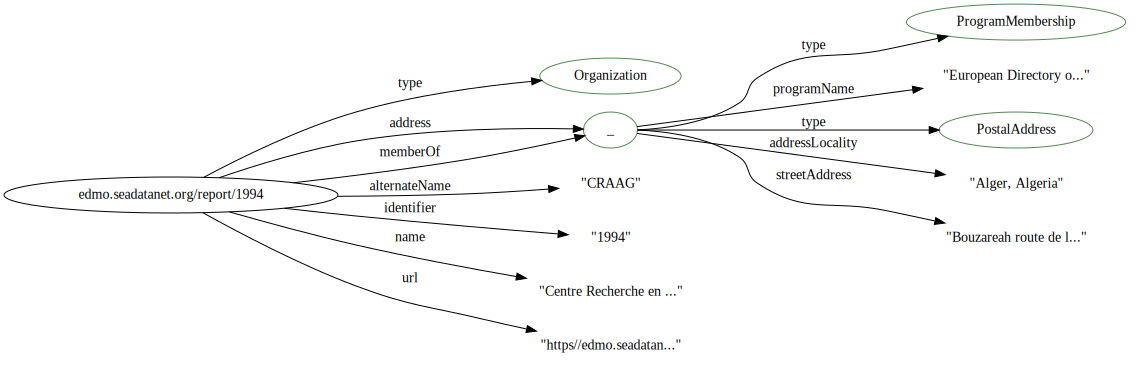

In [2]:
import json
from pyld import jsonld
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

# with open("./graphs/person.json") as dgraph:
#     doc = json.load(dgraph)

doc = json.loads(datagraph)

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)
jbutils.show_graph(compacted)